# Mushroom Classification

In [19]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

## 1. Load the dataset

In [3]:
dataset = pd.read_csv('mushrooms.csv')
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 2. Analyze data

In [4]:
#dimensions of the dataset
dataset.shape

(8124, 23)

In [5]:
#data types of each attribute
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We can see that all of the attributes are numeric (float)

In [6]:
#peak of the data
dataset.head(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [7]:
#summarize the distribution of each attribute
set_option('precision', 2)
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
for col in dataset.columns:
    dataset[col] = dataset[col].astype('category')
dataset.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

## 3. Data visualizations

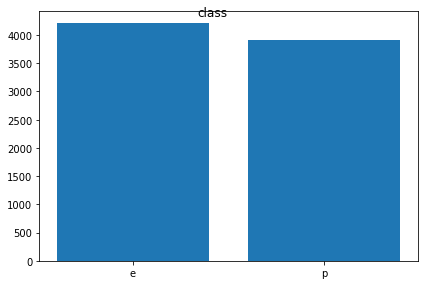

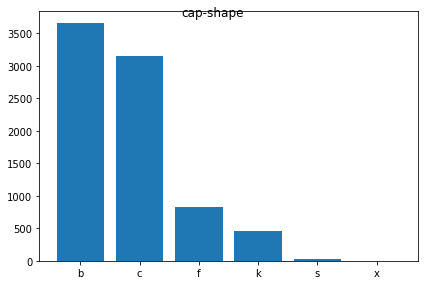

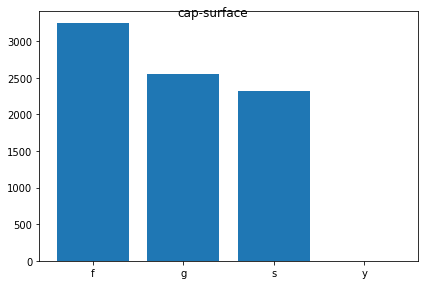

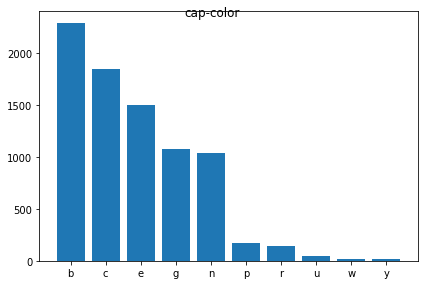

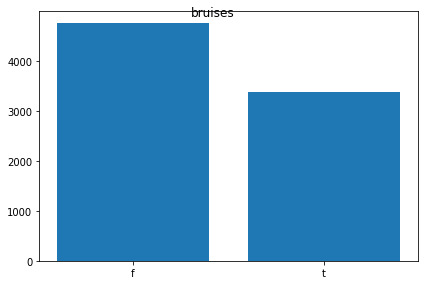

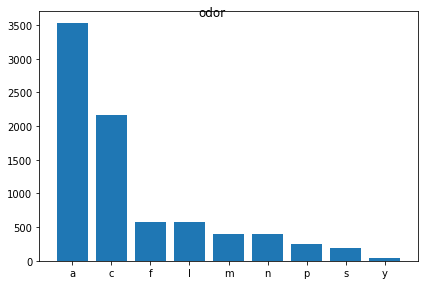

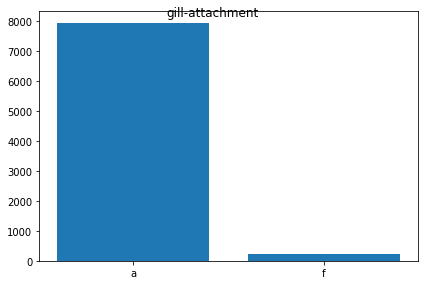

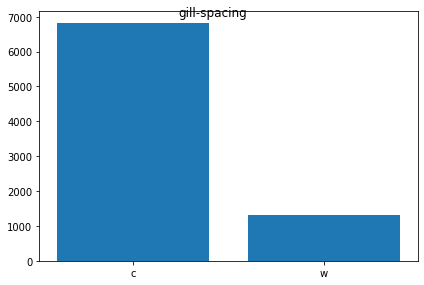

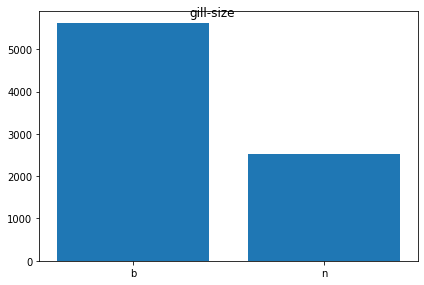

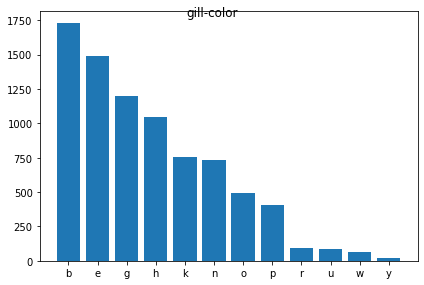

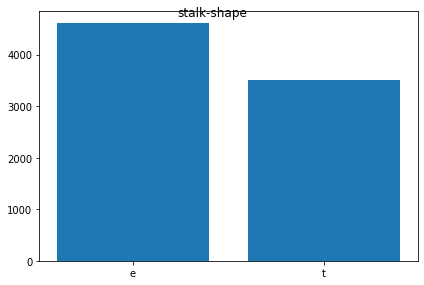

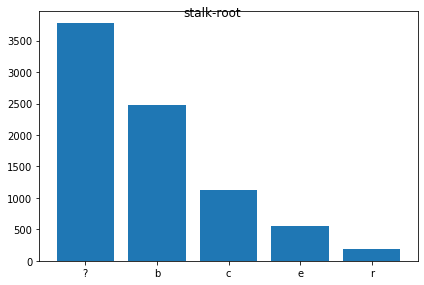

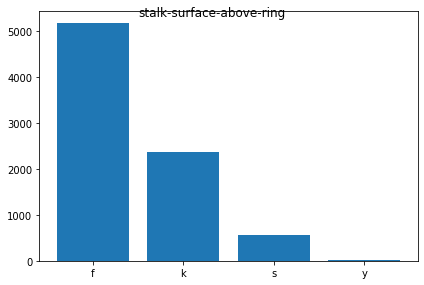

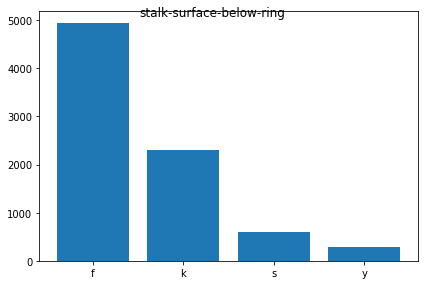

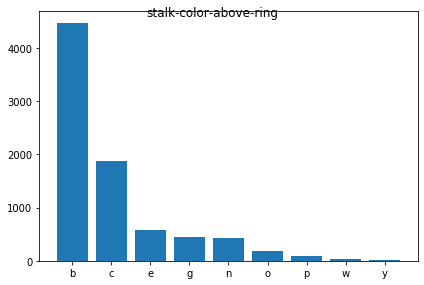

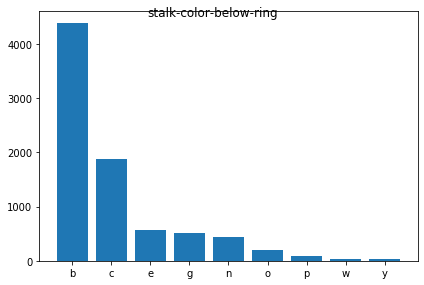

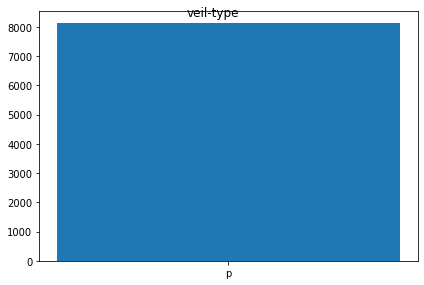

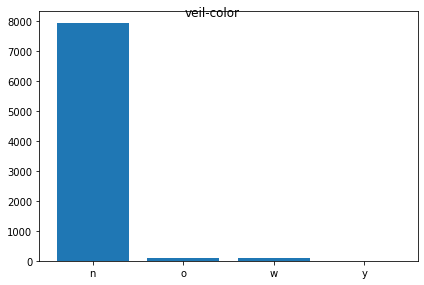

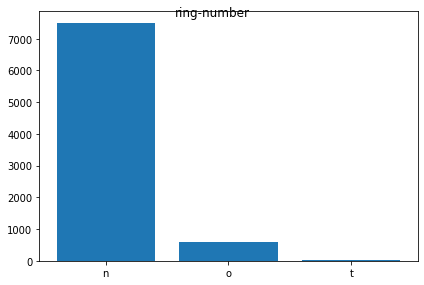

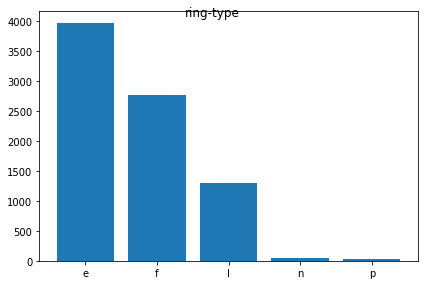

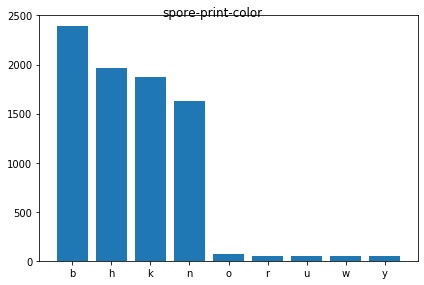

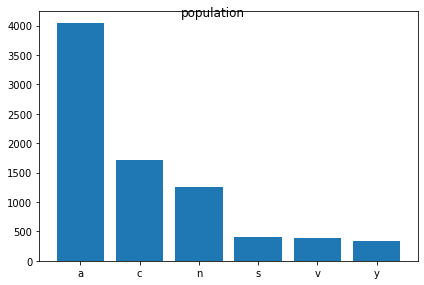

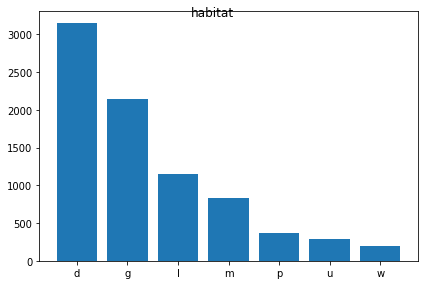

In [15]:
for col in dataset.columns :
    fig = pyplot.figure()
    pyplot.bar(dataset[col].cat.categories.tolist(), dataset[col].value_counts())
    fig.suptitle(col)
    fig.tight_layout()

## 4. Validation dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to conﬁrm the accuracy of our ﬁnal model. It is a smoke test that we can use to see if we messed up and to give us conﬁdence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [53]:
#split-out validation dataset
array = dataset.values
X = dataset.drop(['class'], axis=1).values
Y = dataset['class'].astype('category').values
val_size = 0.2
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((6499, 22), (6499,), (1625, 22), (1625,))

In [54]:
#preprocess data
encoder = OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
encoder_y = LabelEncoder()
Y_train = encoder_y.fit_transform(Y_train)

## 5. Evaluate algorithms: baseline
We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use 10-fold cross-validation. The dataset is not too small and this is a good standard test harness conﬁguration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [43]:
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of diﬀerent algorithms. We will select a suite of diﬀerent algorithms capable of working on this regression problem. The six algorithms selected include:
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- Nonlinear Algorithms: Classiﬁcation and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [44]:
#spot-check algorithms
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.947376 (+-0.010109)
LDA: 0.942451 (+-0.011627)
KNN: 0.999077 (+-0.001020)
CART: 1.000000 (+-0.000000)
NB: 0.917680 (+-0.012780)
SVM: 0.987999 (+-0.006029)


Let’s take a look at the distribution of scores across all cross-validation folds by algorithm.

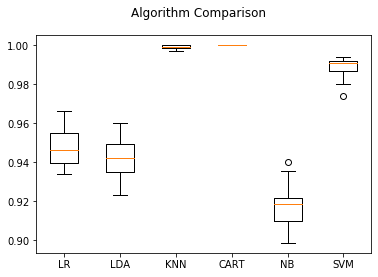

In [45]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Best models: CART (1.00)

## 6. Evaluate algorithms: Standardization
We suspect that the diﬀering scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [46]:
#standardize the dataset
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.951070 (+-0.010542)
ScaledLDA: 0.942451 (+-0.011627)
ScaledKNN: 0.999846 (+-0.000462)
ScaledCART: 1.000000 (+-0.000000)
ScaledNB: 0.917680 (+-0.012780)
ScaledSVM: 1.000000 (+-0.000000)


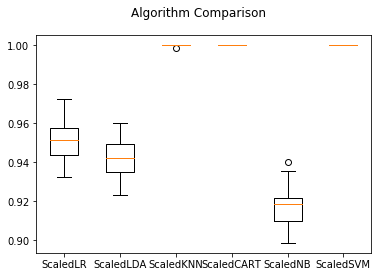

In [47]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The best ones, scaled KNN (1.00), scaled CART (1.00) and Scaled SVM (1.00).

## 8. Ensemble methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four diﬀerent ensemble machine learning algorithms, two boosting and two bagging methods:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).
We will use the same test harness as before, 10-fold cross-validation and pipelines that standardize the training data for each fold.

### 8.1 Without standardization

In [48]:
#ensembles
ensembles = dict()
ensembles['AB'] = AdaBoostClassifier()
ensembles['GBM'] = GradientBoostingClassifier()
ensembles['RF'] = RandomForestClassifier()
ensembles['ET'] = ExtraTreesClassifier()
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

AB: 1.000000 (+-0.000000)
GBM: 1.000000 (+-0.000000)
RF: 1.000000 (+-0.000000)
ET: 1.000000 (+-0.000000)


We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

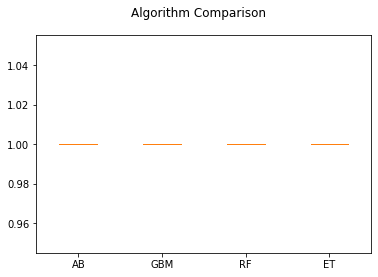

In [49]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

All models has the better scores, we will choose RF (1.00)

In [50]:
#ensembles
ensembles = dict()
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in ensembles.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledAB: 1.000000 (+-0.000000)
ScaledGBM: 1.000000 (+-0.000000)
ScaledRF: 1.000000 (+-0.000000)
ScaledET: 1.000000 (+-0.000000)


We can see that we’re not getting better scores than our linear and nonlinear algorithms in previous sections.

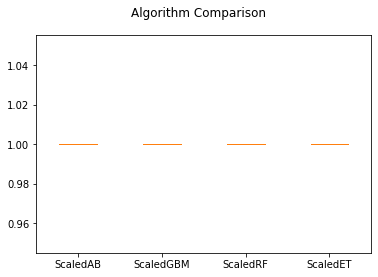

In [51]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 9. Improve results with tunning
We know from the results in the previous section that RF achieves good results on the dataset, it doesn´t care if we standardize the data or not.

In [56]:
#RF algorithm tunning
estimators = [100, 200, 300, 400, 500, 600, 800]
param_grid = dict(n_estimators=estimators)
model = RandomForestClassifier()
kfol = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'n_estimators': 100}
1.000000 (0.000000) with: {'n_estimators': 100}
1.000000 (0.000000) with: {'n_estimators': 200}
1.000000 (0.000000) with: {'n_estimators': 300}
1.000000 (0.000000) with: {'n_estimators': 400}
1.000000 (0.000000) with: {'n_estimators': 500}
1.000000 (0.000000) with: {'n_estimators': 600}
1.000000 (0.000000) with: {'n_estimators': 800}


With all estimators we obtain the same results (100). Let's take 100 estimators.

## 10. Finalize model
In this section we will ﬁnalize the RF model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [57]:
#prepare and train the model
model = RandomForestClassifier(n_estimators=100, )
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#transform the validation dataset
X_val = encoder.transform(X_val)
#make predictions
predictions = model.predict(X_val)
predictions = encoder_y.inverse_transform(predictions)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

1.0
[[840   0]
 [  0 785]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       840
           p       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1, 'Confusion matrix')

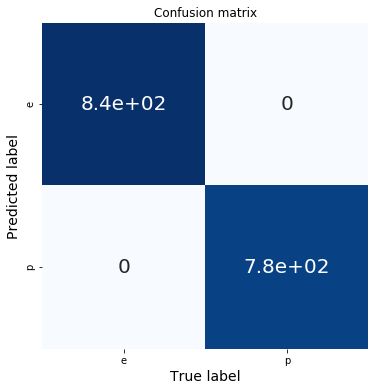

In [62]:
#plot the confusion matrix
pyplot.figure(figsize = (8,6))
seaborn.heatmap(confusion_matrix(Y_val, predictions), square=True, annot=True, annot_kws={"size": 20},
                cmap=pyplot.cm.Blues, cbar=False, xticklabels=['e', 'p'], yticklabels=['e', 'p'])
pyplot.xlabel('True label', fontsize=14)
pyplot.ylabel('Predicted label', fontsize=14)
pyplot.title('Confusion matrix')

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

No handles with labels found to put in legend.


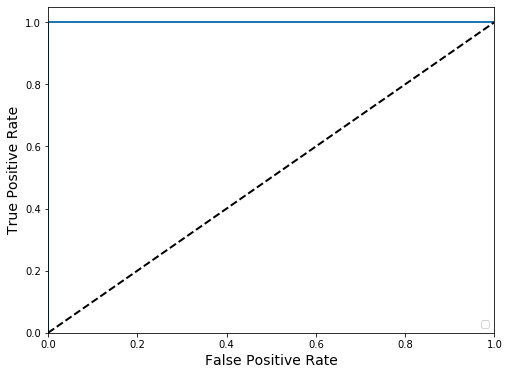

AUC:  1.0


In [61]:
y_prob = model.predict_proba(X_val)
lb = LabelBinarizer()
y_test = lb.fit_transform(Y_val)
#Compute and plot ROC curve and ROC area for each class
pyplot.figure(figsize = (8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
pyplot.plot(fpr, tpr, lw=2)
pyplot.plot([0, 1], [0, 1], 'k--', lw=2)
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate', fontsize=14)
pyplot.ylabel('True Positive Rate', fontsize=14)
#plt.title('ROC Curves for subject %d' % (subject), fontisize=18)
pyplot.legend(loc="lower right")
pyplot.show()
print('AUC: ', roc_auc)